# ANÁLISIS DE COMPONENTES PRINCIPALES



In [1]:
!pip install factor_analyzer

## 0.Carga librerías


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

## 1.Carga de datos

Base de datos Tiendas.xlsx

In [3]:
datos=pd.read_excel("Tiendas.xlsx")

In [4]:
datos.columns

Index(['Sexo', 'Tienda', 'Gente_joven', 'Innovadora', 'Tradicional',
       'Creativa', 'Exclusiva', 'Sexy', 'Moderna', 'Femenina', 'Marca_moda',
       'Lider', 'Open_Mind', 'Divertida', 'Cara', 'Masculina',
       'Despreoucupada', 'Elegante', 'Aburrida', 'Trato_informal', 'Original',
       'Barata', 'Calidad', 'Ropa_duradera', 'Calidad_precio', 'Garantia',
       'Vive_BCN', 'Edad',
       'Aunque_otra_marca_ofrezca_productos_parecidos_a_esta_yo_prefiero',
       'Puede_decirse_mucho_de_una_persona_si_utiliza_esta_marca',
       'Estoy_dispuesto_pagar_más_por_esta_marca',
       'Saber_si_una_persona_utiliza_esta_marca_me_dice_mucho',
       'Cuando_pienso_en_ropa_pienso_en_esta_marca',
       'Esta_marca_es_una_marca_valiosa_para_mi',
       'Utilizar_esta_marca_me_ayuda_a_expresar_mi_personalidad',
       'Preferencia_hacia_la_marca', 'Ingresos', 'Procede'],
      dtype='object')

## 2.Selección variables

Seleccionamos variables que usaremos para PCA

In [5]:
variables=['Gente_joven', 'Innovadora', 'Tradicional',
       'Creativa', 'Exclusiva', 'Sexy', 'Moderna', 'Femenina', 'Marca_moda',
       'Lider', 'Open_Mind', 'Divertida', 'Cara', 'Masculina',
       'Despreoucupada', 'Elegante', 'Aburrida', 'Trato_informal', 'Original',
       'Barata', 'Calidad', 'Ropa_duradera', 'Calidad_precio', 'Garantia']

In [6]:
datos_pca=datos.loc[:,variables]

In [7]:
datos_pca.sample(5)

,Gente_joven,Innovadora,Tradicional,Creativa,Exclusiva,Sexy,Moderna,Femenina,Marca_moda,Lider,...,Despreoucupada,Elegante,Aburrida,Trato_informal,Original,Barata,Calidad,Ropa_duradera,Calidad_precio,Garantia
675,4.0,4.0,3.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,...,3.0,4.0,2.0,3.0,4.0,2.0,5.0,5.0,4.0,4.0
264,4.0,4.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,...,4.0,1.0,1.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
573,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0
708,2.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,...,2.0,4.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0
605,5.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,...,2.0,4.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0


In [8]:
datos_pca.shape

(753, 24)

## 3.Preprocesamos los daos (nulos, etc..)

Base de datos Tiendas.xlsx

In [9]:
datos_pca.isnull().sum()

Gente_joven        1
Innovadora         3
Tradicional        4
Creativa           6
Exclusiva          6
Sexy               3
Moderna            4
Femenina           7
Marca_moda        13
Lider              7
Open_Mind          9
Divertida          5
Cara               5
Masculina          8
Despreoucupada     5
Elegante           7
Aburrida           5
Trato_informal     7
Original           8
Barata             7
Calidad            5
Ropa_duradera      5
Calidad_precio     6
Garantia          10
dtype: int64

In [10]:
for i in datos_pca.columns:
  datos_pca[datos_pca[i].isnull()]=datos_pca[i].mean()

In [11]:
datos_pca.isnull().sum()

Gente_joven       0
Innovadora        0
Tradicional       0
Creativa          0
Exclusiva         0
Sexy              0
Moderna           0
Femenina          0
Marca_moda        0
Lider             0
Open_Mind         0
Divertida         0
Cara              0
Masculina         0
Despreoucupada    0
Elegante          0
Aburrida          0
Trato_informal    0
Original          0
Barata            0
Calidad           0
Ropa_duradera     0
Calidad_precio    0
Garantia          0
dtype: int64

## 4.Miramos correlaciones para ver la idoneidad de la técnica



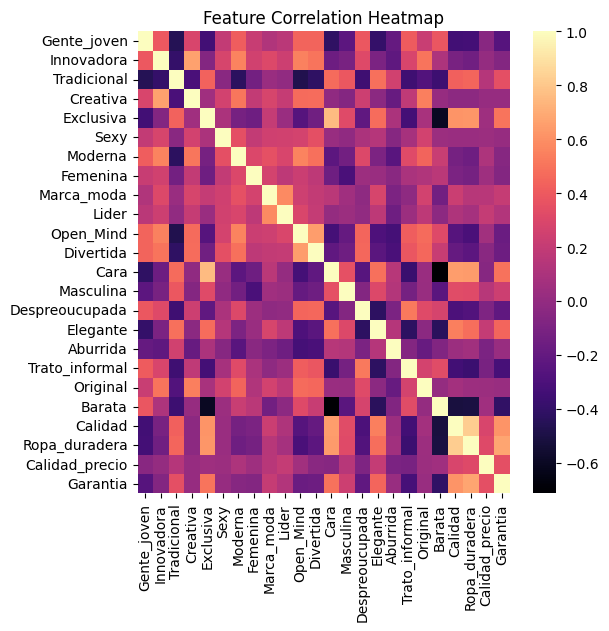

[[ 1.          0.39626094 -0.45928747  0.28839647 -0.34025957  0.19410273
   0.4159947   0.21266459  0.11787161  0.1585913   0.44232849  0.43873647
  -0.41500378 -0.23208818  0.38926388 -0.39275534 -0.19199578  0.40755063
   0.22175378  0.37920439 -0.33915856 -0.3362436  -0.04881027 -0.26123782]
 [ 0.39626094  1.         -0.39766208  0.66299112 -0.06591513  0.28232248
   0.55503486  0.25305524  0.30964057  0.23427338  0.54626781  0.50110059
  -0.15893359 -0.11261331  0.3166476  -0.1016397  -0.22313342  0.28451799
   0.50296322  0.10816837 -0.1156335  -0.15022927  0.00531618 -0.07004357]
 [-0.45928747 -0.39766208  1.         -0.30596169  0.43308809 -0.04302297
  -0.43036503 -0.13254472  0.02796583 -0.00794712 -0.47917356 -0.41759236
   0.46964423  0.38592234 -0.3562926   0.4894169   0.25647469 -0.35345789
  -0.27480148 -0.3641093   0.42659439  0.44716614  0.13841     0.34778852]
 [ 0.28839647  0.66299112 -0.30596169  1.          0.05360973  0.25936917
   0.5062318   0.19031585  0.283472

In [12]:
# Ver correlaciones
import seaborn as sns
import matplotlib.pyplot as plt
# create covariance matrix
corr_matrix = np.corrcoef(datos_pca.T)

# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f',xticklabels=datos_pca.columns, yticklabels=datos_pca.columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()
print(corr_matrix)

## 5.Aplicamos la técnica a las variables seleccionadas


In [13]:
# Calcular PCA y entrenar el modelo
#pca_tiendas_rot = FactorAnalyzer(rotation="varimax", n_factors=6, method='principal')
numero_componentes=6
pca_tiendas_rot = FactorAnalyzer(rotation="varimax",n_factors=numero_componentes, method='principal')
pca_tiendas_rot.fit(datos_pca)

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

## 6.Vemos las diferentes cosas que nos interesan


### 6.1.Varianza explicada

Vemos lo que explica cada componente de la información original

In [14]:
# Varianza explicada

pca_varianzas = pd.DataFrame({'Absoluto': pca_tiendas_rot.get_eigenvalues()[0],
                              '%': 100*pca_tiendas_rot.get_eigenvalues()[0]/sum(pca_tiendas_rot.get_eigenvalues()[0])})
pca_varianzas['Acumulado']=pca_varianzas['%']
for i in range(1,pca_varianzas.shape[0]):
  pca_varianzas.iloc[i,2]=pca_varianzas.iloc[i-1,2]+pca_varianzas.iloc[i,1]


pca_varianzas

,Absoluto,%,Acumulado
0,6.862959,28.595661,28.595661
1,4.096685,17.069521,45.665182
2,1.629211,6.788381,52.453563
3,1.286936,5.362234,57.815798
4,1.119829,4.665952,62.481750
5,0.946725,3.944688,66.426437
6,0.843274,3.513641,69.940079
7,0.822739,3.428078,73.368157
8,0.656670,2.736126,76.104283
9,0.591027,2.462612,78.566895


### 6.2.Comunalidades

Vemos lo que explican las componentes retenidas de cada variable original

In [15]:
# comunalidades
pca_comunalidades = pd.DataFrame(data = 100*pca_tiendas_rot.get_communalities(),columns=['Comunalidad'],index=variables)
pca_comunalidades

,Comunalidad
Gente_joven,47.555746
Innovadora,63.839137
Tradicional,63.847663
Creativa,61.543933
Exclusiva,73.089713
Sexy,41.740711
Moderna,62.182768
Femenina,68.826897
Marca_moda,69.304888
Lider,75.363660


### 6.3.Matriz de Saturaciones

Vemos la matriz de saturaciones de donde podremos extraer lo que significac cada variable (poner los nombres)

In [16]:
# Ver lamatriz de saturaciones
names = [f"C{i+1}" for i in range(numero_componentes)]
pca_saturaciones = pd.DataFrame(data = pca_tiendas_rot.loadings_,columns=names,index=variables)
pca_saturaciones

,C1,C2,C3,C4,C5,C6
Gente_joven,-0.461483,0.497773,0.080274,0.029627,-0.080776,-0.031095
Innovadora,-0.034829,0.755335,0.159822,-0.047690,-0.185416,-0.066716
Tradicional,0.458638,-0.484156,0.158387,0.124880,0.212488,0.328464
Creativa,0.130257,0.739589,0.105795,-0.069032,-0.172629,-0.075645
Exclusiva,0.836993,0.022291,0.041556,-0.053903,0.127285,0.094918
Sexy,0.055944,0.397251,0.379541,-0.025244,-0.118889,0.312484
Moderna,-0.154232,0.684939,0.262504,0.134891,-0.202032,-0.031278
Femenina,-0.120238,0.209450,0.220618,0.093590,-0.718977,0.235760
Marca_moda,0.200843,0.261184,0.756974,0.051858,-0.092799,-0.013517
Lider,-0.007460,0.163556,0.833045,0.118643,0.053366,-0.126265


## 7.Nuevos datos

Generamos (transform) los nuevos datos

### 7.1.Cálculo de los nuevos datos


In [17]:
# Nuevos datos
# Para ver las nuevas puntuaciones en las componentes
principalComponents=pca_tiendas_rot.transform(datos_pca)
principalComponents
nuevos_datos = pd.DataFrame(data = principalComponents,columns=names)
nuevos_datos

,C1,C2,C3,C4,C5,C6
0,-0.187412,-0.177339,1.610433,0.149318,-0.135118,-0.595827
1,-0.045376,0.080089,0.413787,0.480474,0.295045,-1.594291
2,-0.945004,0.438901,1.844267,0.850446,0.065333,0.545878
3,0.140690,0.498826,1.370946,0.859357,-0.556923,-0.877618
4,-0.448144,1.864591,1.470997,0.401970,0.199261,0.078750
...,...,...,...,...,...,...
748,0.430606,-0.660864,0.556446,-0.285423,-0.156169,-1.209208
749,-1.497071,-1.185153,0.505496,0.018735,0.500485,-1.728863
750,-0.906279,0.528908,-0.552067,-0.374290,-1.219643,0.579708
751,1.290019,2.857114,-1.014904,0.488632,-1.190766,2.370958


### 7.2.Poner los nombres correctos


In [18]:
nuevos_datos.columns=['Exclusiva_C','Innovadora_C','Líder_C','Calidad_Precio_C','Hombre_C','Aburrida_C']

In [19]:
nuevos_datos

,Exclusiva_C,Innovadora_C,Líder_C,Calidad_Precio_C,Hombre_C,Aburrida_C
0,-0.187412,-0.177339,1.610433,0.149318,-0.135118,-0.595827
1,-0.045376,0.080089,0.413787,0.480474,0.295045,-1.594291
2,-0.945004,0.438901,1.844267,0.850446,0.065333,0.545878
3,0.140690,0.498826,1.370946,0.859357,-0.556923,-0.877618
4,-0.448144,1.864591,1.470997,0.401970,0.199261,0.078750
...,...,...,...,...,...,...
748,0.430606,-0.660864,0.556446,-0.285423,-0.156169,-1.209208
749,-1.497071,-1.185153,0.505496,0.018735,0.500485,-1.728863
750,-0.906279,0.528908,-0.552067,-0.374290,-1.219643,0.579708
751,1.290019,2.857114,-1.014904,0.488632,-1.190766,2.370958


### 7.3.Obtener la matriz original con los nuevos datos transformados


In [20]:
nuevos_datos.reset_index(drop=True, inplace=True)
datos.reset_index(drop=True, inplace=True)
df=pd.concat([datos,nuevos_datos],axis=1)

In [21]:
df.sample(5)

,Sexo,Tienda,Gente_joven,Innovadora,Tradicional,Creativa,Exclusiva,Sexy,Moderna,Femenina,...,Utilizar_esta_marca_me_ayuda_a_expresar_mi_personalidad,Preferencia_hacia_la_marca,Ingresos,Procede,Exclusiva_C,Innovadora_C,Líder_C,Calidad_Precio_C,Hombre_C,Aburrida_C
400,Mujer,H&M,5.0,4.0,1.0,4.0,1.0,4.0,4.0,5.0,...,1.0,6.0,Entre 3001 y 4000@,Escuela pública,-1.319378,1.113225,0.478416,-1.819908,0.598650,2.231079
284,Mujer,Primark,5.0,3.0,2.0,1.0,1.0,3.0,4.0,4.0,...,2.0,9.0,NaN,Escuela privada,-2.501571,-0.361181,2.335815,-1.680794,1.459783,-0.531903
503,Mujer,Mango,3.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,...,2.0,NaN,NaN,Escuela privada,0.100925,0.553301,-0.806763,0.463449,-0.971770,-0.374985
188,Mujer,Zara,3.0,3.0,1.0,3.0,1.0,3.0,4.0,4.0,...,5.0,10.0,Menos de 1000€,Ambas,-1.706086,0.048903,1.680478,0.991839,0.367675,-1.322968
429,Mujer,Mango,4.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,...,NaN,7.0,Entre 5001 y 7500€,Escuela privada,-0.392107,-1.284800,-0.996140,-1.740751,-0.104228,-0.759794


## 8. Uso en este caso concreto de las componentes obtenidas


### 8.1.Ver las medias de cada Tienda en las 6 componentes


In [22]:
perfiles=df.groupby('Tienda')[nuevos_datos.columns].mean()
perfiles['Tienda']=perfiles.index

In [23]:
perfiles

,Exclusiva_C,Innovadora_C,Líder_C,Calidad_Precio_C,Hombre_C,Aburrida_C,Tienda
Tienda,,,,,,,
Adolfo Dominguez,0.721063,-0.145533,-0.363894,-0.136747,-0.248433,0.367005,Adolfo Dominguez
Bershka,-0.849997,0.291735,0.127859,-0.617514,-0.028605,0.097013,Bershka
Burberrys,1.208143,-0.707013,0.093389,-0.258462,-0.093105,0.250284,Burberrys
Cortefiel,0.243389,-1.167290,-0.726259,-0.027936,-0.364306,0.585184,Cortefiel
Custo,0.787462,1.741122,-0.505534,-0.672824,-0.775748,0.011689,Custo
Desigual,0.386600,1.401419,-0.999232,-0.700155,-0.074659,-0.920207,Desigual
Furest,1.075471,-0.536020,0.087125,-0.153474,0.983860,0.041498,Furest
H&M,-0.889687,0.306454,-0.231769,-0.254218,-0.307913,-0.047052,H&M
Levi´s,0.304658,0.054859,0.031144,0.378420,0.998551,0.075350,Levi´s


### 8.2.Ver las Tiendas en un mapa conceptual de 2 de las 6 componentes

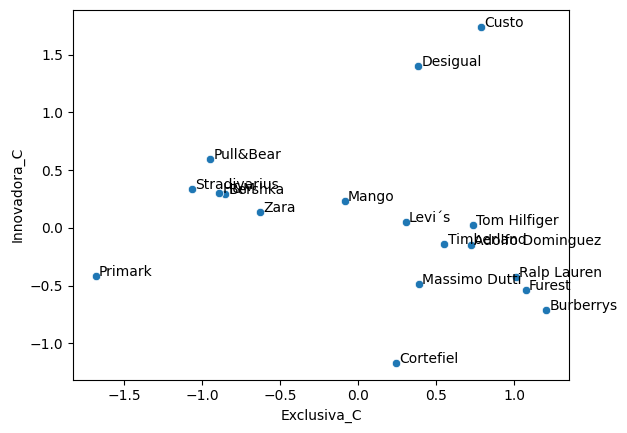

In [24]:
sns.scatterplot(data=perfiles,x='Exclusiva_C',y='Innovadora_C',legend=True)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(perfiles.Exclusiva_C, perfiles.Innovadora_C, perfiles.Tienda, plt.gca())


### 8.3.Cluster de tiendas


In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

perfiles_cluster=perfiles.drop(columns='Tienda', inplace=False)
numero_clusters = 3
kmeans = KMeans(n_clusters=numero_clusters, random_state=42)
clusters = kmeans.fit_predict(perfiles_cluster)
# Agregar la columna de clusters al DataFrame original
perfiles['Cluster'] = clusters
perfiles

,Exclusiva_C,Innovadora_C,Líder_C,Calidad_Precio_C,Hombre_C,Aburrida_C,Tienda,Cluster
Tienda,,,,,,,,
Adolfo Dominguez,0.721063,-0.145533,-0.363894,-0.136747,-0.248433,0.367005,Adolfo Dominguez,0
Bershka,-0.849997,0.291735,0.127859,-0.617514,-0.028605,0.097013,Bershka,2
Burberrys,1.208143,-0.707013,0.093389,-0.258462,-0.093105,0.250284,Burberrys,0
Cortefiel,0.243389,-1.167290,-0.726259,-0.027936,-0.364306,0.585184,Cortefiel,0
Custo,0.787462,1.741122,-0.505534,-0.672824,-0.775748,0.011689,Custo,2
Desigual,0.386600,1.401419,-0.999232,-0.700155,-0.074659,-0.920207,Desigual,2
Furest,1.075471,-0.536020,0.087125,-0.153474,0.983860,0.041498,Furest,0
H&M,-0.889687,0.306454,-0.231769,-0.254218,-0.307913,-0.047052,H&M,2
Levi´s,0.304658,0.054859,0.031144,0.378420,0.998551,0.075350,Levi´s,0


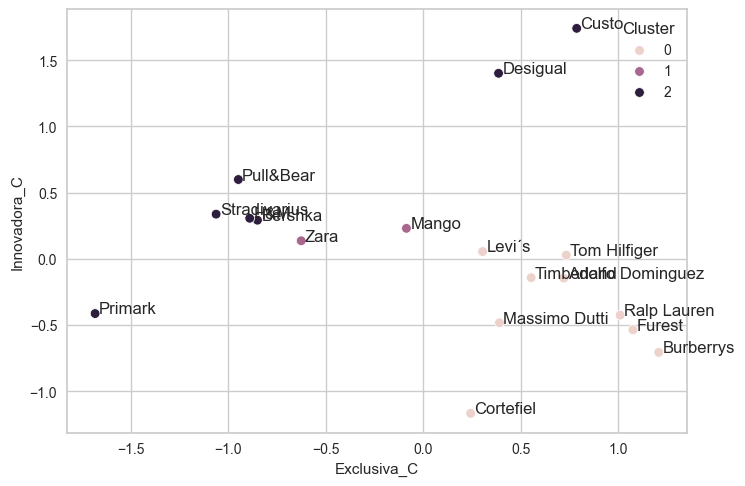

In [26]:
sns.scatterplot(data=perfiles,x='Exclusiva_C',y='Innovadora_C',hue='Cluster')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(perfiles.Exclusiva_C, perfiles.Innovadora_C, perfiles.Tienda, plt.gca())